

<br />
<br />
<br />

# **Introdução**#
### **Projeto 2 Udacity - Titanic**
Nesse projeto será avaliado um conjunto de dados para se aferir algumas perguntas
com base na possível relação ou não entre as variáveis<br /> de estudo, assim como na
plotagem desses dados para uma melhor vizualização. O dataset em questão trás dados sobre o acidente com <br /> o navio
Titanic, após se chocar com um iceberg em abril de 1912:

### **Origem da base da dados**###
Essa base de dados faz parte da conclusão do curso de Fundamentos de Data Science I da Udacity, a base de dados foi obtida no site do<br />kaggle, e dentre os dados há informações e dados demográficos referentes as 891 das 2208 pessoas da enciclopédia Titanic, o que tornará<br /> possível perguntas e respostas.

### **Perguntas:**###
1. Quais são os títulos de tratamento junto aos nomes?
2. Quantas cabines não possuíam a identificação informada?
3. Qual a relação entre as tarifas pagas e as idades?
4. Em qual cidade embarcou mais passageiros?
5. Qual a relação de sobreviventes por classe?
6. Qual a faixa etária mais presente entre os passageiros?
<br />


***Importando as bibliotecas e o dataset necessário a análise***

In [1]:
#Importando as bibliotecas e o dataset necessário.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
np.random.seed
% matplotlib inline

titanic_df = pd.read_csv('titanic-data-6.csv')

***As primeiras linhas de dados***

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Averiguando as dimensões do dataframe com o argumento shape***

In [3]:
titanic_df.shape

(891, 12)

## **A limpeza dos dados**##
***Verifica se há dados ausentes, utilizando o argumento info***

In [4]:
titanic_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


***Preenchendo as células NaN com a média dos valores atribuídos à coluna Age***

In [5]:
mean = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean, inplace=True)

***Utilizando info para observar se as alterações tiveram efeito***

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


***Verifica se há dados duplicado***

In [7]:
sum(titanic_df.duplicated())

0

***Remove as colunas que não serão utilizadas***

In [8]:
titanic_df = titanic_df.drop(['PassengerId', 'Ticket'], axis=1)

***Checa se as alterações funcionaram***

In [9]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


***Converte a coluna Embarked para uma string de melhor leitura***

In [10]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'})
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,Southampton
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,Southampton


***Função para contar o número de passageiros em cada classe.***

In [11]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## ***Desenvolvimento***
***Quantos são os títulos junto aos nomes?***<br />
São: Mr 517, Miss 182, Mrs 125, Master 40 e Rare 27.

***Instrução def para pegar os títulos dos nomes***

In [12]:
def get_title(name):
    
    """Função para contar os títulos de tratamento dos 
    nomes a partir da coluna Name.
    Retorna:
    Nome do título
    
    """    
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

non_rare = ["Mr", "Miss", "Mrs", "Master"] # non rare titles
title = titanic_df["Name"].map(get_title)
title = np.where(title.isin(non_rare), title, "Rare")
titanic_df["Title"] = title

***Resultado da função get_title para os títulos***

In [13]:
titanic_df["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

***Quantas cabines não possuíam identificação informada?***<br />
687 cabines não tiveram a identificação informada.

***Instrução def para extrair número de cabines sem identificação***

In [14]:
def extract_cabin(cabin):
    
    """Função para contar o número de cabines que não
    possuem identificação a partir da coluna Cabin.
    Retorna:
    Número de cabines
    
    """ 
    split = re.split("\s", cabin)        
    cabin_letter = [s[0] for s in split]
    if len(set(cabin_letter)) == 1: # if the elements in the list are the same, 
        return cabin_letter[0] # return the element
    else:
        return "M" # otherwise return "M"
    
titanic_df["Cabin_letter"] = titanic_df["Cabin"].map(lambda x: "U" if pd.isnull(x) else extract_cabin(x))

***Averigua o resultado obtido pela função acima***

In [15]:
titanic_df["Cabin_letter"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F      9
M      4
G      4
T      1
Name: Cabin_letter, dtype: int64

***Qual a relação entre as idades e as tarifas pagas?***<br />
Abaixo no gráfico, é possível ver que a concentração dos valores se dá na região do gráfico próximo a base<br /> 
principalmente na faixa etária entre 20 e 50 anos, nessa faixa também se observa valores mais elevados em<br /> 
termos de tarifa.

***Estilo gerado pelo matplotlib a partir do ggplot***

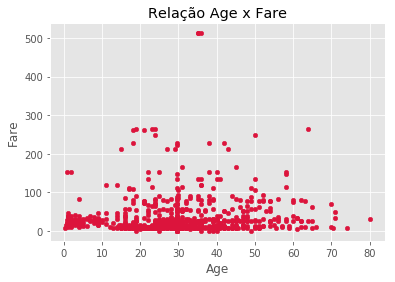

In [16]:
plt.style.use('ggplot')
#Linha responsável pela plotagem do gráfico de dispersão da idade em relação ao valor da tarifa
titanic_df.plot(kind="scatter", x="Age", y="Fare", color='crimson', title='Relação Age x Fare');

***Em qual cidade embarcou mais passageiros?***<br />
A cidade que teve o maior número de passageiros foi a cidade de Southhampton.

***Gráfico exibindo a distribuição dos passageiros pelas cidades***

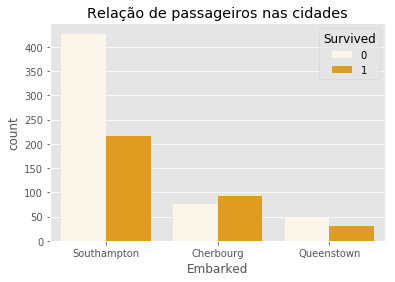

In [17]:
sns.countplot(x='Embarked', hue='Survived', color='orange', data=titanic_df);
plt.title('Relação de passageiros nas cidades');

***Qual a relação de sobreviventes por classe?***<br />
Observa-se pelo gráfico abaixo, que a classe com o maior número de passageiros sobreviventes,<br />
foi a classe 1, seguido da classe 3 e 2.

***Usando a biblioteca seaborn para plotar o gráfico***

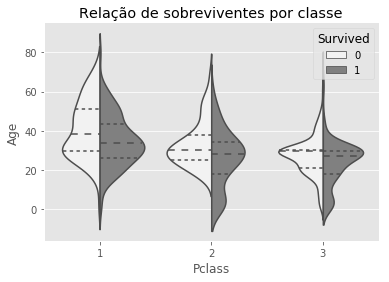

In [18]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True, color='gray', inner='quart')
sns.despine(left=False)
plt.title('Relação de sobreviventes por classe');

***Qual a faixa etária mais presente entre os passageiros?***<br />
No gráfico abaixo, se observa uma maior presença de passageiros, na faixa etária que vai de 18 a 32 anos,<br />
e uma baixíssima presença de pessoas com idade acima dos 70 anos.

***Usando biblioteca matplotlib para plotar o histograma abaixo***

<Figure size 432x288 with 0 Axes>

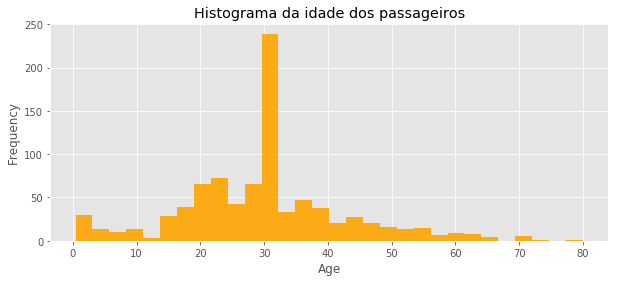

In [19]:
plt.figure();
titanic_df.hist(column='Age', color=('orange'), alpha= 0.9, bins=30, figsize=(10,4))
plt.title('Histograma da idade dos passageiros')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<br />

## **A conclusão**<br />

A análise exploratória teve como objetivo identificar atributos de um grupo de<br />
viajantes, a cerca de sua sobrevivência, e qual a relação entre algumas variáveis<br />
analizadas. As tarifas pagas para viajar, se mantiveram próximas aos valores<br /> mais econômicos em todas as faixas
etárias observadas,embora tenha  se<br /> visto uma maior concentração de valores mais elevados na 
faixa etária<br /> que vai dos 20 aos 50 anos.

Olhando o gráfico acima, se observa que muitos viajantes tinham idades entre<br /> 18 e 32 anos, embora também houvesse muitas crianças com meses de idade,<br /> adolescentes e pessoas com idades acima dos 50 anos.

Em outro gráfico é possível vê que a cidade de Southhampton, na Inglaterra,<br /> foi a cidade onde a maior parte dos viajantes embarcou, essa quantidade<br /> de passageiros pode ter ocorrido em função de ser uma viagem inaugural, e<br /> muitos trabalhavam no porto e estavam retornando pra casa, mas também<br /> houve embarque na cidade francesa de Cherbourg, e na cidade de Queenstown,<br /> na Irlanda, onde se registrou o menor número de passageiros a bordo, essa<br /> seria a última parada antes da chegada a Nova Iorque.

As melhores chances de sobrevivência foram na classe 1, o fato da classe 1<br /> estar perto do convés pode ter influenciado um maior número de sobreviventes,<br /> ao contrário da classe 3 mais distante do convés, embora tenha havido perdas<br /> em todas as classes


É importate ressaltar que as conclusões identificadas não são definitivas, pois<br /> não se apoiam em técnicas estatística para a realização do estudo.
<br />

## **As limitações**<br />
Numa primeira análise foi possível observar que algumas propriedades não<br /> possuíam valores para alguns dos 
passageiros, dentre elas:Age, Cabin e Embarked.

As medidas aferidas, foram:
Age: Os valores ausentes nessa característica foram<br /> preenchidos com base na idade média da mesma classe de embarque
do passageiro<br /> em questão.

As propriedades PassengerId e Tickect não foram consideradas na fase de análise.

Embarked: O local de embarque foi preenchido com base na mesma probabilidade de<br /> selecionar um dos locais de embarque da mesma classe de passageiros em questão.

Após, alterou-se a representação da característica Embarked para uma melhor leitura,<br /> e a propriedade Name passou a ocupar
a posição do índice.



## **Bibliografia**<br />

https://github.com/suzanasvm/TitanicUdacity<br />
https://paulovasconcellos.com.br<br />
https://pt.wikipedia.org/wiki/RMS_Titanic<br />

<br />
<br />
<br />










